###### <img src="Electronic_Brain.png" width="200" style="float:left">
<h1> Summer 2021 ML Course.</h1>
<h2> Exercise 5: Linear and NonLinear Regression (Anscombe Quartet)<br>Tools: Numpy, Pandas, Scikit-Learn</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from icecream import ic

<img src="desktop-computer-icon.png" width="40" style="float:left">
<h1> &nbsp; Section A: Signal Generation</h1>

In [2]:
anscombe_dict = {
    'X1' : [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'Y1' : [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    'X2' : [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'Y2' : [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    'X3' : [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'Y3' : [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    'X4' : [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    'Y4' : [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89],
}
anscombe_df = pd.DataFrame(anscombe_dict)

<img src="desktop-computer-icon.png" width="40" style="float:left">
<h1> &nbsp; Section B: First and Second Order Stats Extraction</h1>

In [3]:
# Calculate first & second order stats.
Xvars = ['X' + str(i+1) for i in range(4)]
Yvars = ['Y' + str(i+1) for i in range(4)]
Xmeans = [anscombe_df[Xvars[i]].mean() for i in range(4)]
Ymeans = [anscombe_df[Yvars[i]].mean() for i in range(4)]
Xstds = [anscombe_df[Xvars[i]].std() for i in range(4)]
Ystds = [anscombe_df[Yvars[i]].std() for i in range(4)]
XYcorrs = [anscombe_df[Xvars[i]].corr(anscombe_df[Yvars[i]]) for i in range(4)]

<img src="desktop-computer-icon.png" width="40" style="float:left">
<h1> &nbsp; Section C: Linear Regression and Visualization</h1>

In [4]:
# Create a linear regressor for each dataset.
# Notice: reshape(-1,1) generates a row vector, as demanded by LinearRegression() below.
X = np.linspace(2,20,200).reshape(-1,1)
reg_arr = {}
for i in range(4):
    X_train = np.array(anscombe_df[Xvars[i]]).reshape(-1, 1)
    Y_train = np.array(anscombe_df[Yvars[i]])
    # Y_train = np.array(anscombe_df[Yvars[i]]).reshape(-1, 1).ravel()  # The reshape & ravel are unnecessary, my bad!
    reg_arr[i] = LinearRegression().fit(X_train, Y_train)

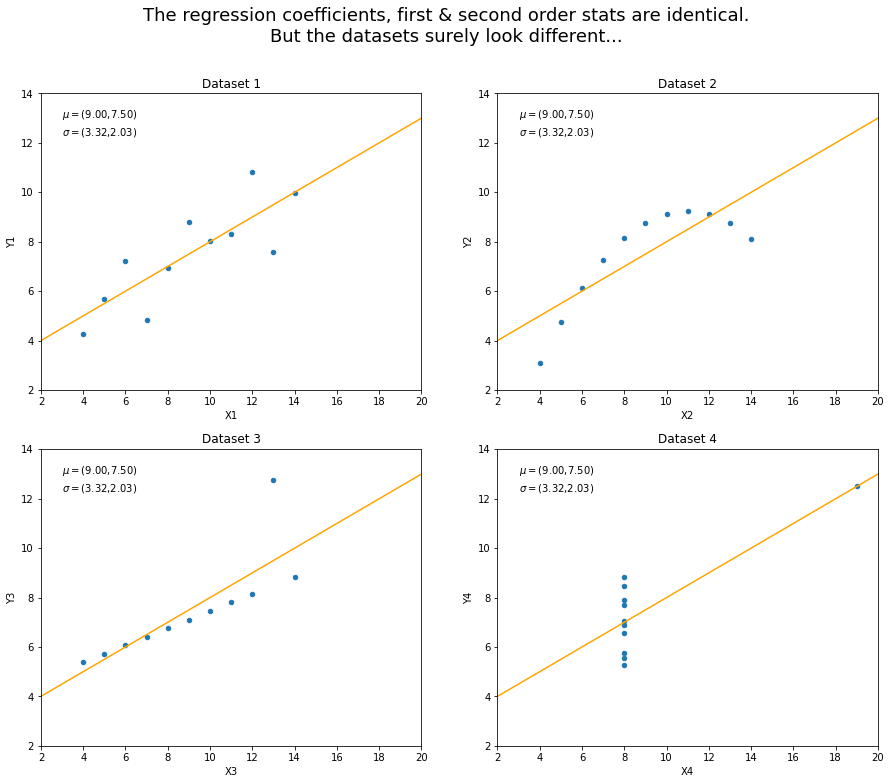

In [5]:
# Plot everything.    
plt.rcParams['figure.figsize'] = [15, 12]
fig, axes = plt.subplots(nrows=2, ncols=2)
anscombe_df.plot.scatter(x="X1", y="Y1", ax=axes[0,0], title='Dataset 1', xlim=[2, 20], ylim=[2, 14]);
anscombe_df.plot.scatter(x="X2", y="Y2", ax=axes[0,1], title='Dataset 2', xlim=[2, 20], ylim=[2, 14]);
anscombe_df.plot.scatter(x="X3", y="Y3", ax=axes[1,0], title='Dataset 3', xlim=[2, 20], ylim=[2, 14]);
anscombe_df.plot.scatter(x="X4", y="Y4", ax=axes[1,1], title='Dataset 4', xlim=[2, 20], ylim=[2, 14]);
axes[0,0].plot(X, reg_arr[0].predict(X), color='orange');
axes[0,0].text(3, 13, r'$\mu=($' + "{:.2f}".format(Xmeans[0]) + ',' + "{:.2f}".format(Ymeans[0]) +')')
axes[0,0].text(3, 12.3, r'$\sigma=($' + "{:.2f}".format(Xstds[0]) + ',' + "{:.2f}".format(Ystds[0]) +')')
axes[0,1].plot(X, reg_arr[1].predict(X), color='orange');
axes[0,1].text(3, 13, r'$\mu=($' + "{:.2f}".format(Xmeans[1]) + ',' + "{:.2f}".format(Ymeans[1]) +')')
axes[0,1].text(3, 12.3, r'$\sigma=($' + "{:.2f}".format(Xstds[1]) + ',' + "{:.2f}".format(Ystds[1]) +')')
axes[1,0].plot(X, reg_arr[2].predict(X), color='orange');
axes[1,0].text(3, 13, r'$\mu=($' + "{:.2f}".format(Xmeans[2]) + ',' + "{:.2f}".format(Ymeans[2]) +')')
axes[1,0].text(3, 12.3, r'$\sigma=($' + "{:.2f}".format(Xstds[2]) + ',' + "{:.2f}".format(Ystds[2]) +')')
axes[1,1].plot(X, reg_arr[3].predict(X), color='orange');
axes[1,1].text(3, 13, r'$\mu=($' + "{:.2f}".format(Xmeans[3]) + ',' + "{:.2f}".format(Ymeans[3]) +')')
axes[1,1].text(3, 12.3, r'$\sigma=($' + "{:.2f}".format(Xstds[3]) + ',' + "{:.2f}".format(Ystds[3]) +')')
fig.suptitle('The regression coefficients, first & second order stats are identical.\nBut the datasets surely look different...', fontsize=18);

<img src="desktop-computer-icon.png" width="40" style="float:left">
<h1> &nbsp; Section D: Robust Linear Regression</h1>

In [6]:
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor
estimators = [
    ('OLS',       LinearRegression()),
    # ('Huber',     HuberRegressor(alpha=0.0, epsilon=1.35)),  # Exercise version.
    ('Huber',     HuberRegressor(alpha=0.0, epsilon=1.35, max_iter=200)), # Solution version (gets rid of the warning).
    ('Theil-Sen', TheilSenRegressor(n_subsamples=8, fit_intercept=True, random_state=43)),
    ('RANSAC',    RANSACRegressor(min_samples=8, random_state=43))
]
colors = {'OLS':'red', 'Theil-Sen':'blue', 'RANSAC':'green', 'Huber':'magenta'}

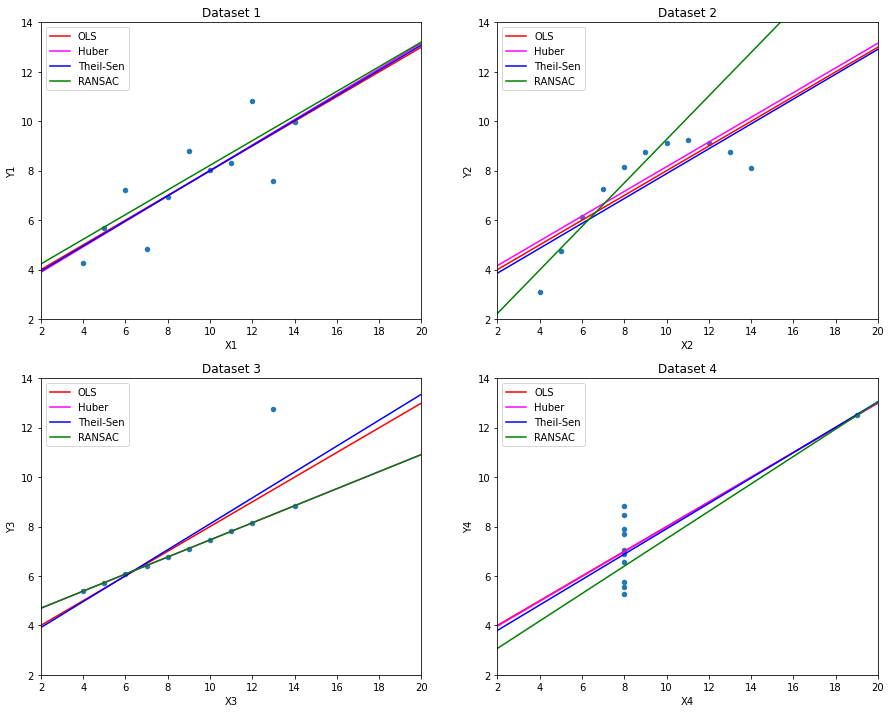

In [7]:
# Plot everything.    
plt.rcParams['figure.figsize'] = [15, 12]
fig, axes = plt.subplots(nrows=2, ncols=2)
anscombe_df.plot.scatter(x="X1", y="Y1", ax=axes[0,0], title='Dataset 1', xlim=[2, 20], ylim=[2, 14]);
anscombe_df.plot.scatter(x="X2", y="Y2", ax=axes[0,1], title='Dataset 2', xlim=[2, 20], ylim=[2, 14]);
anscombe_df.plot.scatter(x="X3", y="Y3", ax=axes[1,0], title='Dataset 3', xlim=[2, 20], ylim=[2, 14]);
anscombe_df.plot.scatter(x="X4", y="Y4", ax=axes[1,1], title='Dataset 4', xlim=[2, 20], ylim=[2, 14]);

# Fit each robust estimator to each dataset.
X = np.linspace(2,20,200).reshape(-1,1)
for i in range(4):
    X_train = np.array(anscombe_df[Xvars[i]]).reshape(-1, 1)
    Y_train = np.array(anscombe_df[Yvars[i]])
    # Y_train = np.array(anscombe_df[Yvars[i]]).reshape(-1, 1).ravel() # The reshape & ravel are unnecessary, my bad!
    
    curr_axes = axes[i//2, i%2] # This happens to coincide with the subplots' arrangement.    
    for name, estimator in estimators:
        reg = estimator.fit(X_train, Y_train)
        curr_axes.plot(X, reg.predict(X), color=colors[name], label=name)

    curr_axes.legend(loc='upper left')

<img src="desktop-computer-icon.png" width="40" style="float:left">
<h1> &nbsp; Section E: Robust Nonlinear Regression</h1>

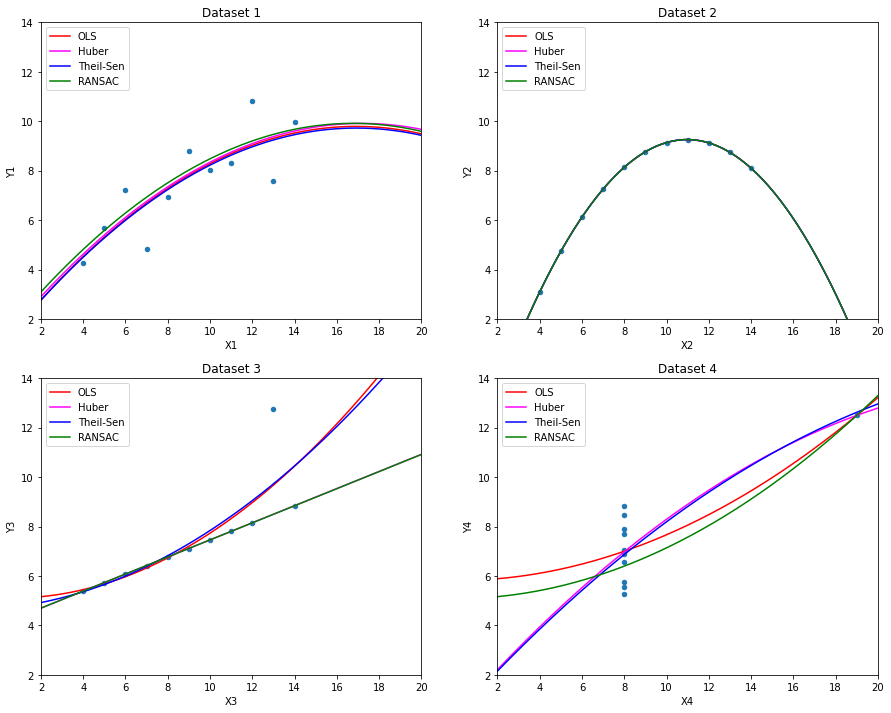

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Fit a cubic polynomial to the data using the same set of estimators.
# Plot everything.    
plt.rcParams['figure.figsize'] = [15, 12]
fig, axes = plt.subplots(nrows=2, ncols=2)
anscombe_df.plot.scatter(x="X1", y="Y1", ax=axes[0,0], title='Dataset 1', xlim=[2, 20], ylim=[2, 14]);
anscombe_df.plot.scatter(x="X2", y="Y2", ax=axes[0,1], title='Dataset 2', xlim=[2, 20], ylim=[2, 14]);
anscombe_df.plot.scatter(x="X3", y="Y3", ax=axes[1,0], title='Dataset 3', xlim=[2, 20], ylim=[2, 14]);
anscombe_df.plot.scatter(x="X4", y="Y4", ax=axes[1,1], title='Dataset 4', xlim=[2, 20], ylim=[2, 14]);

# Fit each robust estimator to each dataset.
X = np.linspace(2,20,200).reshape(-1,1)
for i in range(4):
    X_train = np.array(anscombe_df[Xvars[i]]).reshape(-1, 1)
    Y_train = np.array(anscombe_df[Yvars[i]]) # Again, same comment regarding reshape(-1, 1).ravel()
    
    curr_axes = axes[i//2, i%2] # This coincides with the subplots' arrangement.
    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(2), estimator)
        model.fit(X_train, Y_train)
        curr_axes.plot(X, model.predict(X), color=colors[name], label=name)

    curr_axes.legend(loc='upper left')

<img src="desktop-computer-icon.png" width="40" style="float:left">
<h1> &nbsp; Section F: Test the Regressors via LeaveOneOut</h1>

In [9]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
sum_abs_error = {}
for name, estimator in estimators:
    sum_abs_error[name] = {}
    model = make_pipeline(PolynomialFeatures(2), estimator)
    
    # Loop over the datasets.
    for i in range(4):
        sum_abs_error[name][i+1] = 0
        X = np.array(anscombe_df[Xvars[i]]).reshape(-1, 1)
        Y = np.array(anscombe_df[Yvars[i]]).reshape(-1, 1).ravel()
        for train_index, test_index in loo.split(X):
            reg = model.fit(X[train_index], Y[train_index])
            prediction = reg.predict(X[test_index])
            ground_truth = Y[test_index]
            sum_abs_error[name][i+1] += np.abs(prediction - ground_truth)
            # print("Alg:", name, "Dataset:", i, "Pred:", prediction, "GT:", ground_truth)
ic(sum_abs_error);

ic| sum_abs_error: {'Huber': {1: array([14.34903999]),
                              2: array([0.01079533]),
                              3: array([4.30705313]),
                              4: array([38.00593516])},
                    'OLS': {1: array([12.88638397]),
                            2: array([0.01713155]),
                            3: array([10.63167192]),
                            4: array([16.53233333])},
                    'RANSAC': {1: array([17.84936046]),
                               2: array([0.01713155]),
                               3: array([4.28162538]),
                               4: array([17.5902381])},
                    'Theil-Sen': {1: array([12.78270799]),
                                  2: array([0.01709153]),
                                  3: array([10.9597018]),
                                  4: array([37.56841351])}}
